In [12]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np


from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [13]:
Nsim = 15
FirstStim = 9
LastStim = 20.0

In [14]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [15]:
print Nsim
print FirstStim
print LastStim

15
9
20.0


In [16]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

Mp = np.zeros((int(Nsim), 1))
Hp = np.zeros((int(Nsim), 1))
Stim = np.zeros((int(Nsim), 1))
emg = np.zeros([len(t), int(Nsim)])
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345861 synapses were built
All the 0 synaptic noises were built


In [17]:
for j  in xrange(0, int(Nsim)):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.time()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i],0)
        pools[2].atualizeAfferentPool(t[i],0)
    toc = time.time()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    pools[0].listSpikes()
    pools[1].listSpikes()
    pools[2].listSpikes()
    sp1 = pools[0].poolTerminalSpikes
    sp2 = pools[1].poolTerminalSpikes
    sp2 = pools[2].poolTerminalSpikes
    for k in xrange(0, len(pools)):
        pools[k].reset()

81.5679781437 seconds
[0.]
[0.]
84.51740098 seconds
[0.]
[0.]
86.0366699696 seconds
[0.00033363]
[0.09387697]
87.31772089 seconds
[0.21739764]
[1.26713308]
87.690155983 seconds
[0.33992724]
[1.89995254]
85.5860230923 seconds
[0.83532927]
[2.44134688]
84.8856539726 seconds
[0.98303795]
[3.0167926]
84.662348032 seconds
[1.64317308]
[2.9579119]
84.5882549286 seconds
[2.41547188]
[2.37633971]
85.795719862 seconds
[2.3740744]
[2.18006809]
88.1995480061 seconds
[2.85923477]
[1.92378566]
86.0727710724 seconds
[3.35236842]
[1.12254872]
87.4403400421 seconds
[4.03845737]
[1.02700334]
86.3365030289 seconds
[3.45739421]
[0.85491881]
87.7345221043 seconds
[4.10797117]
[0.42204733]


<IPython.core.display.Javascript object>


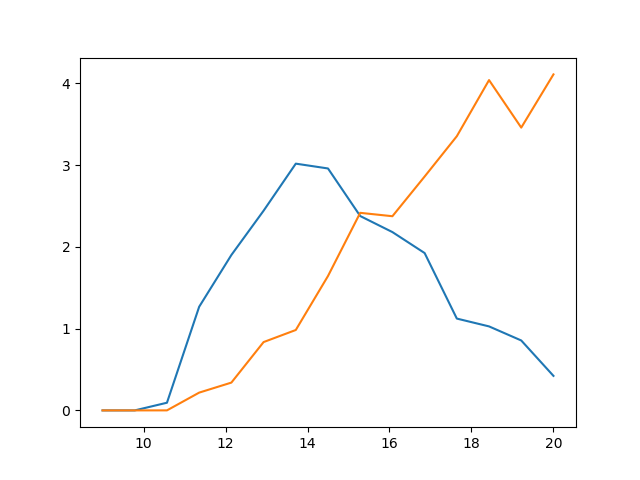

In [18]:

f1 = plt.figure()
plt.plot(Stim, Hp, Stim, Mp)


In [19]:
np.max(Hp)/np.max(Mp)

0.7343753102639408

In [20]:
Mp

array([[0.00000000e+00],
       [0.00000000e+00],
       [3.33630130e-04],
       [2.17397641e-01],
       [3.39927241e-01],
       [8.35329273e-01],
       [9.83037951e-01],
       [1.64317308e+00],
       [2.41547188e+00],
       [2.37407440e+00],
       [2.85923477e+00],
       [3.35236842e+00],
       [4.03845737e+00],
       [3.45739421e+00],
       [4.10797117e+00]])

<IPython.core.display.Javascript object>


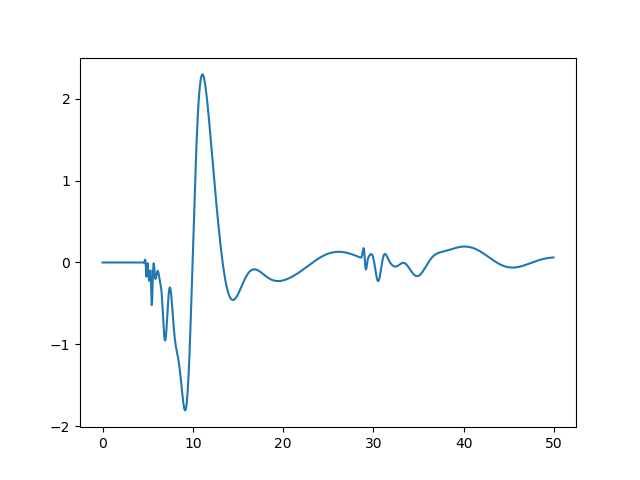

In [21]:
f2 = plt.figure()
plt.plot(t, emg[:,14])


In [22]:
pools[0].listSpikes()

<IPython.core.display.Javascript object>


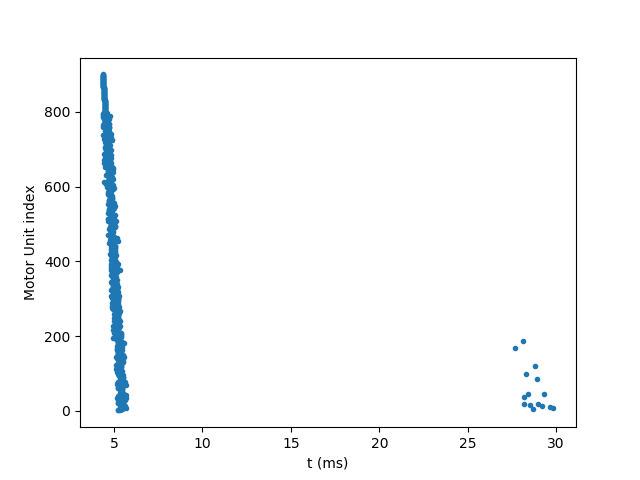

Text(0,0.5,'Motor Unit index')

In [23]:
f3 = plt.figure()
plt.plot(sp1[:, 0],
         sp1[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')


In [24]:
pools[0].poolTerminalSpikes[:, 1]

array([], dtype=float64)